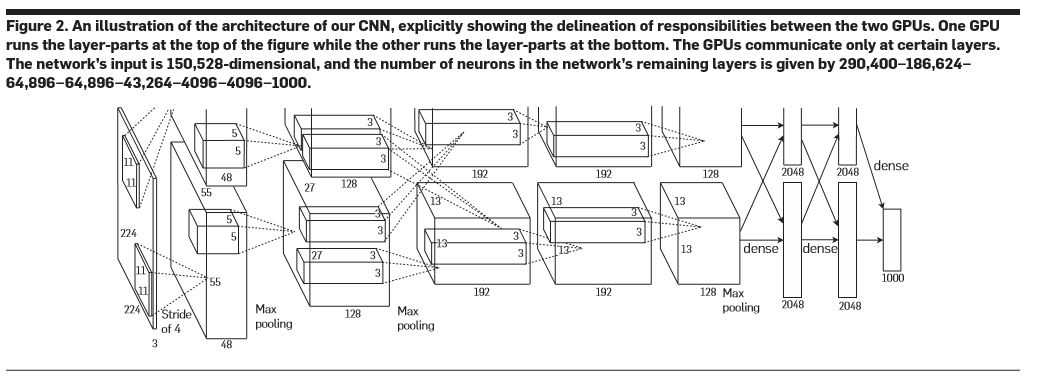

In [1]:
from IPython.display import Image
Image(filename='alexnet.jpg')

### <font color = Blue> Fashion MNIST problem

In [1]:
# Load the dataset (preloaded in Keras)
from matplotlib import pyplot
from keras.datasets import fashion_mnist

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))



Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


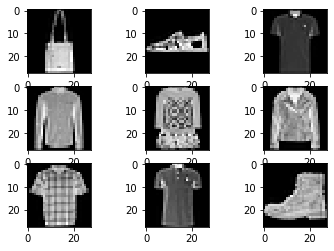

In [2]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(331+ i)
    # plot raw pixel data
    pyplot.imshow(trainX[i+200], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [7]:
# Step 1
# Import dependencies
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# Step 2
# Reshape train and test datasets
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Step 3
# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)

# Step 4 
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

# Step 5
# define cnn model
model = Sequential()
# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# Pooling layer
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# Infinte

# FLatten the output
# 13x13x32 = 5408(bias would not effect the flattening phase) 



model.add(Flatten())
# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# Output Layer
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
train_norm.shape
trainY.shape


(60000, 10)

In [9]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2163300   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 2,164,630
Trainable params: 2,164,630
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit model
anything = model.fit(train_norm, trainY, epochs=2, batch_size=32, validation_data=(test_norm, testY), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 46s 767us/step - loss: 0.4471 - accuracy: 0.8409 - val_loss: 0.3737 - val_accuracy: 0.8672
Epoch 2/2
60000/60000 [==============================] - 45s 758us/step - loss: 0.2959 - accuracy: 0.8917 - val_loss: 0.3114 - val_accuracy: 0.8863


In [11]:
# evaluate model
loss, acc = model.evaluate(test_norm, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 88.630


In [12]:
type(anything.history)

anything.history

{'val_loss': [0.3736808236122131, 0.31144807560443877],
 'val_accuracy': [0.8672000169754028, 0.8863000273704529],
 'loss': [0.44708991057078046, 0.2958628830830256],
 'accuracy': [0.8409167, 0.89175]}

### <font color = Blue> CIFAR 10 Data
<b>Canadian Institute For Advanced Research</b><br>
60,000 32 × 32 pixel color photographs of objects from 10 classes
    
0: airplane <br>
1: automobile<br>
2: bird<br>
3: cat<br>
4: deer<br>
5: dog<br>
6: frog<br>
7: horse<br>
8: ship<br>
9: truck<br>

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


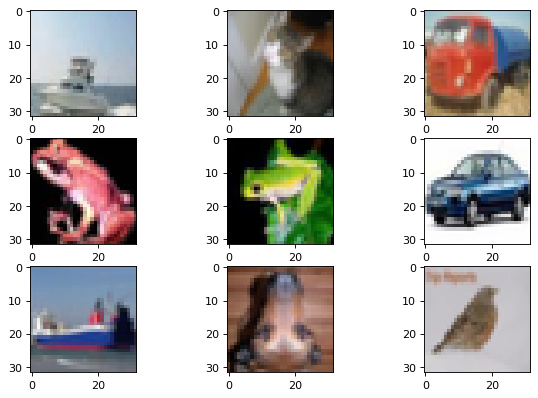

In [14]:
# Load dataset, comes with Keras
from matplotlib import pyplot
from keras.datasets import cifar10
from matplotlib import pyplot
from matplotlib.pyplot import figure


(trainX, trainy), (testX, testy) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(331 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i+100])
# show the figure
pyplot.show()

### <font color = blue> Simulating 2014 VGG model winner of ILSVRC
This will be done by adding number of VGG blocks to the model to compare accuracy rates

In [15]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from datetime import datetime

(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


# ----------------------------------------------
# Single VGG block
# ----------------------------------------------

print("--------------------------------------------------")
print("--------------------------------------------------")
print("Single VGG block")

a1  = datetime.now()
print("Time at the beginning of the first iteration", a1)


model_VGG1 = Sequential()
model_VGG1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_VGG1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG1.add(MaxPooling2D((2, 2)))
model_VGG1.add(Flatten())
model_VGG1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_VGG1.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model_VGG1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



history_VGG1 = model_VGG1.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

b1  = datetime.now()
print("Time at the end of the first iteration", b1)


# ----------------------------------------------
# Two VGG blocks
# ----------------------------------------------
print("--------------------------------------------------")
print("--------------------------------------------------")
print("Two VGG blocks")
print("--------------------------------------------------")
print("--------------------------------------------------")

a2  = datetime.now()
print("Time at the beginning of the second iteration", a2)

model_VGG2 = Sequential()
model_VGG2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_VGG2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG2.add(MaxPooling2D((2, 2)))
model_VGG2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG2.add(MaxPooling2D((2, 2)))
model_VGG2.add(Flatten())
model_VGG2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_VGG2.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model_VGG2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history_VGG2 = model_VGG2.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

print("--------------------------------------------------")

b2  = datetime.now()
print("Time at the end of the second iteration", b2)



# ----------------------------------------------
# Three VGG blocks
# ----------------------------------------------

print("--------------------------------------------------")
print("--------------------------------------------------")
print("Three VGG blocks")
print("--------------------------------------------------")
print("--------------------------------------------------")

a3  = datetime.now()
print("Time at the beginning of the third iteration", a3)

model_VGG3 = Sequential()
model_VGG3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_VGG3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG3.add(MaxPooling2D((2, 2)))
model_VGG3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG3.add(MaxPooling2D((2, 2)))
model_VGG3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_VGG3.add(MaxPooling2D((2, 2)))
model_VGG3.add(Flatten())
model_VGG3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_VGG3.add(Dense(10, activation='softmax'))    
    
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model_VGG3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history_VGG3 = model_VGG3.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

print("--------------------------------------------------")
print("--------------------------------------------------")
b3  = datetime.now()
print("Time at the end of the thirds iteration", b3)


--------------------------------------------------
--------------------------------------------------
Single VGG block
Time at the beginning of the first iteration 2020-04-08 03:25:04.442759
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 107s 2ms/step - loss: 1.7222 - accuracy: 0.3821 - val_loss: 1.5065 - val_accuracy: 0.4511
Epoch 2/5
50000/50000 [==============================] - 108s 2ms/step - loss: 1.3671 - accuracy: 0.5120 - val_loss: 1.2869 - val_accuracy: 0.5440
Epoch 3/5
50000/50000 [==============================] - 106s 2ms/step - loss: 1.2006 - accuracy: 0.5732 - val_loss: 1.1886 - val_accuracy: 0.5784
Epoch 4/5
50000/50000 [==============================] - 108s 2ms/step - loss: 1.0749 - accuracy: 0.6198 - val_loss: 1.1031 - val_accuracy: 0.6053
Epoch 5/5
50000/50000 [==============================] - 121s 2ms/step - loss: 0.9736 - accuracy: 0.6589 - val_loss: 1.0329 - val_accuracy: 0.6326
Time at the end of the f

In [13]:
loss, acc = model_VGG1.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
history

> 51.630


In [17]:
history.history

dict

### <font color = red> Save your model for later use

In [15]:
model.save('model_VGG1.h5')


### <font color= red> Load the saved model


In [17]:
from keras.models import load_model
model_VGG1 = load_model('model_VGG1.h5')
print(model_VGG1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
None


### <font color = blue> Preloaded VGG Model

In [11]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553467904/553467096 [==============================] - 61s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

### <font color = blue>  Putting VGG into action

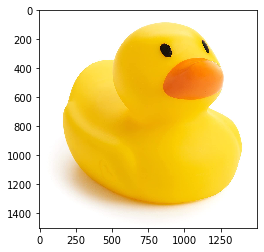

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

from matplotlib import image
from matplotlib import pyplot
%matplotlib inline

# load image as pixel array
data = image.imread('duck2.jpg')
# summarize shape of the pixel array

# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

# load an image from file
image = load_img('duck2.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

# load the model
model = VGG16()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('Most likely the picture is a ''%s (%.2f%%)' % (label[1], label[2]*100))

In [6]:
decode_predictions(yhat)


[[('n03724870', 'mask', 0.5930988),
  ('n02817516', 'bearskin', 0.19761807),
  ('n04192698', 'shield', 0.03943348),
  ('n02895154', 'breastplate', 0.018770931),
  ('n03026506', 'Christmas_stocking', 0.016236199)]]

### <font color= blue> GoogleNet Inception Model


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# 1x1 conv
conv1 = Conv2D(256, (1,1), padding='same', activation='relu')(layer_in)
# 3x3 conv
conv3 = Conv2D(256, (3,3), padding='same', activation='relu')(layer_in)
# 5x5 conv
conv5 = Conv2D(3, (5,5), padding='same', activation='relu')(layer_in)
# 3x3 max pooling
pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
# concatenate filters, assumes filters/channels last
layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)



### <font color = blue> Preloaded Inception Model

In [10]:
from keras.applications.inception_v3 import InceptionV3 
# load model
inception = InceptionV3()
# summarize the model
inception.summary()


96116736/96112376 [==============================] - 8s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________